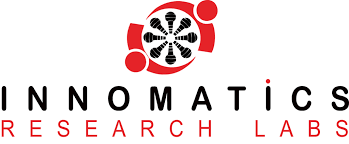

# EDA on Music Data

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os 
import random
from datetime import datetime
from scipy import sparse
#from scipy.sparse import csr matrix

warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

## importing the data
### Dataset1

In [107]:
df1 = pd.read_csv('E:\Innomatics\Music_Recommender_System\data\kaggle\kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
df1.head(n=10)

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2


In [108]:
df.describe()

,freq
count,1.491951e+06
mean,3.179720e+00
std,7.015025e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491951 entries, 0 to 1491951
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1491951 non-null  object
 1   song_id      1491951 non-null  object
 2   freq         1491951 non-null  int64 
 3   track_id     1491951 non-null  object
 4   auther_name  1491951 non-null  object
 5   release      1491951 non-null  object
dtypes: int64(1), object(5)
memory usage: 79.7+ MB


In [110]:
df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
auther_name    0
release        0
dtype: int64

### Dataset2

In [111]:
df2 =pd.read_csv(r'E:\Innomatics\Music_Recommender_System\data\kaggle\unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','auther_name','release'])
df2.head(n=10)

,track_id,song_id,auther_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
5,TRMMMXN128F42936A5,SOZVAPQ12A8C13B63C,David Montgomery,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All..."
6,TRMMMLR128F1494097,SOQVRHI12A6D4FB2D7,Sasha / Turbulence,We Have Got Love
7,TRMMMBB12903CB7D21,SOEYRFT12AB018936C,Kris Kross,2 Da Beat Ch'yall
8,TRMMMHY12903CB53F1,SOPMIYT12A6D4F851E,Joseph Locke,Goodbye
9,TRMMMML128F4280EE9,SOJCFMH12A8C13B0C2,The Sun Harbor's Chorus-Documentary Recordings,Mama_ mama can't you see ?


In [112]:
df2[df2['song_id']=='SOBONKR12A58A7A7E0']

,track_id,song_id,auther_name,release
448841,TRAEHHJ12903CF492F,SOBONKR12A58A7A7E0,Dwight Yoakam,You're The One


In [113]:
df2.describe()

,track_id,song_id,auther_name,release
count,1000000,1000000,1000000,999985
unique,1000000,999056,72665,702000
top,TRNYWAM128F14A8EE6,SOQNMCD12A8C1383D4,Michael Jackson,Intro
freq,1,3,194,1511


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   track_id     1000000 non-null  object
 1   song_id      1000000 non-null  object
 2   auther_name  1000000 non-null  object
 3   release      999985 non-null   object
dtypes: object(4)
memory usage: 30.5+ MB


In [115]:
df2.isnull().sum()

track_id        0
song_id         0
auther_name     0
release        15
dtype: int64

In [116]:
df2.dropna(inplace = True)

In [117]:
df2.isnull().sum()

track_id       0
song_id        0
auther_name    0
release        0
dtype: int64

## Merging the datasets to a combined data

In [118]:
df = pd.merge(df1, df2, how='left', on = 'song_id')

In [119]:
df

,user_id,song_id,freq,track_id,auther_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla


In [122]:
df.shape

(1491952, 6)

In [123]:
df.describe()

,freq
count,1.491952e+06
mean,3.179719e+00
std,7.015023e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [124]:
df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       1
auther_name    1
release        1
dtype: int64

In [125]:
df.dropna(thresh=1)

,user_id,song_id,freq,track_id,auther_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla


In [126]:
df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       1
auther_name    1
release        1
dtype: int64

In [127]:
df.dropna(inplace=True)

In [128]:
df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
auther_name    0
release        0
dtype: int64

In [129]:
df.shape

(1491951, 6)

In [130]:
df.head()

,user_id,song_id,freq,track_id,auther_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


## Basic Statistics

In [132]:
print("Total no of uniques",df.shape[0])
print('Total no of users:',df['user_id'].unique().shape[0])
print('Total no of songs:',df['song_id'].unique().shape[0])
print('Total no of frequency:',df['freq'].unique().shape[0])
print('Total no of track:',df['track_id'].unique().shape[0])
print('Total no of artist name:',df['auther_name'].unique().shape[0])
print('Total no of release:',df['release'].unique().shape[0])

Total no of uniques 1491951
Total no of users: 110000
Total no of songs: 163205
Total no of frequency: 299
Total no of track: 163827
Total no of artist name: 28366
Total no of release: 137670


In [133]:
df.describe(include='all')

,user_id,song_id,freq,track_id,auther_name,release
count,1491951,1491951,1.491951e+06,1491951,1491951,1491951
unique,110000,163205,NaN,163827,28366,137670
top,ad4b2717e89766b66b96fe52a38736116e315874,SOFRQTD12A81C233C0,NaN,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,57,5043,NaN,5043,13675,5043
mean,NaN,NaN,3.179720e+00,NaN,NaN,NaN
std,NaN,NaN,7.015025e+00,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,3.000000e+00,NaN,NaN,NaN


In [134]:
df['song_id'].shape[0]

1491951

In [136]:
df['song_id'].value_counts()

SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOWCKVR12A8C142411    3822
SOAXGDH12A8C13F8A1    3780
                      ... 
SOFOJPI12AB01807E8       1
SOFQGWR12A8C14224F       1
SOYHRIU12A8C141793       1
SOOEJIA12A67020E2D       1
SOWHSHL12AF72A1E90       1
Name: song_id, Length: 163205, dtype: int64

### we can drop either of the columns song_id or track_id

In [137]:
df.drop(['track_id'], axis =1)

,user_id,song_id,freq,auther_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
...,...,...,...,...,...
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla


## Distribution of Frequency

<AxesSubplot:xlabel='freq', ylabel='Density'>

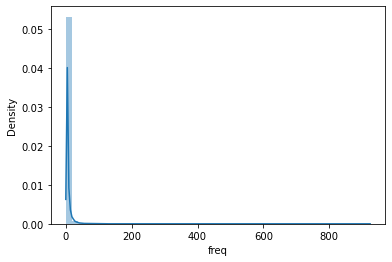

In [138]:
sns.distplot(df['freq'])

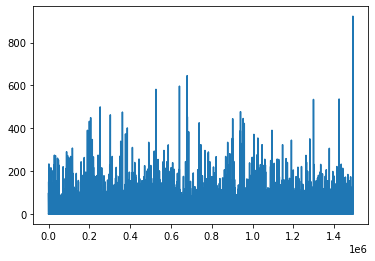

In [54]:
plt.plot(df['freq'])

<AxesSubplot:xlabel='freq', ylabel='Density'>

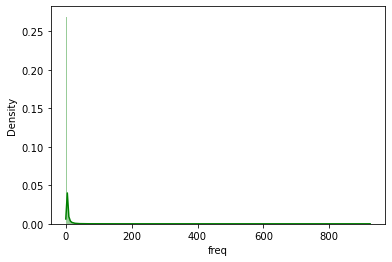

In [60]:
sns.distplot(df['freq'],bins=299,kde=True,color='green')

## TOP 20 SONGS REPEATED

In [57]:
print("Top 20 songs repeated")
df.song_id.value_counts()[:20]

Top 20 songs repeated


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOWCKVR12A8C142411    3822
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
SONYKOW12AB01849C9    3430
SOEGIYH12A6D4FC0E3    3272
SODGVGW12AC9075A8D    3180
SODJWHY12A8C142CCE    2791
SOLFXKT12AB017E3E0    2725
SOFLJQZ12A6D4FADA6    2668
SOPXKYD12A6D4FA876    2598
SOTWSXL12A8C143349    2538
SOULTKQ12AB018A183    2346
SOUSMXX12AB0185C24    2260
SOUVTSM12AC468F6A7    2226
SOHTKMO12AB01843B0    2097
SONIQRE12AF72A2B02    2046
SOTWNDJ12A8C143984    1990
Name: song_id, dtype: int64

## TOP 20 USERS LISTENED MORE SONGS

In [70]:
df['user_id'].value_counts()[:20]

316110734d8da7478cc33237458814f770a9eb7a    57
ad4b2717e89766b66b96fe52a38736116e315874    57
d30e18323f15426c3cdc8585252ed34459916f51    55
3233c598c50f0ddbd351504e773cd51de79691db    55
016a24e91a72c159a5048ab1b9b2ba5ce761b526    54
                                            ..
980379bd355cd6f0270e96a937ab4b6cbed7ea71     5
2aff9b95ebb367df27f0da60c869529bdefe367b     5
2492546250ba1e8c7d3718f14d4ee4ec22eda0de     5
d19e96f90960584f27cdf8ce48d92c85704d01d4     5
4d3e44eab607e0943b03c2ee9827342c983ae779     5
Name: user_id, Length: 110000, dtype: int64

## TOP 20 SONGS MOSTLY PLAYED BY THE USERS

In [139]:
df['song_id'].value_counts()[:20]

SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOWCKVR12A8C142411    3822
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
SONYKOW12AB01849C9    3430
SOEGIYH12A6D4FC0E3    3272
SODGVGW12AC9075A8D    3180
SODJWHY12A8C142CCE    2791
SOLFXKT12AB017E3E0    2725
SOFLJQZ12A6D4FADA6    2668
SOPXKYD12A6D4FA876    2598
SOTWSXL12A8C143349    2538
SOULTKQ12AB018A183    2346
SOUSMXX12AB0185C24    2260
SOUVTSM12AC468F6A7    2226
SOHTKMO12AB01843B0    2097
SONIQRE12AF72A2B02    2046
SOTWNDJ12A8C143984    1990
Name: song_id, dtype: int64

## TOP 20 FAMOUS ARTIST

In [83]:
df['auther_name'].value_counts()[:20]

Coldplay                  13675
Kings Of Leon             11586
Justin Bieber              9259
Florence + The Machine     8213
Eminem                     8160
Muse                       7916
Jack Johnson               7465
Taylor Swift               7435
Train                      6617
The Black Keys             6507
OneRepublic                6027
Linkin Park                5846
Radiohead                  5764
The Killers                5721
John Mayer                 5452
Daft Punk                  5411
Evanescence                5170
Björk                      5144
Guns N' Roses              5061
Harmonia                   5046
Name: auther_name, dtype: int64

## LIST OF ALL THE ARTISTS

In [84]:
list(df['auther_name'].unique())

['Dwight Yoakam',
 'Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner',
 'Cartola',
 'Lonnie Gordon',
 'Miguel Calo',
 'Beastie Boys',
 'Moby',
 'Guano Apes',
 'UDG',
 'moe.',
 'Bahramji & Maneesh De Moor',
 'Michael Card',
 'Jamiroquai',
 'Skunk Anansie',
 'Skinlab',
 'Harmonia',
 'Andrew Bird',
 'The Notorious B.I.G.',
 'The Kills',
 'Florence + The Machine',
 'Bright Eyes',
 'Slum Village',
 'Smile Empty Soul',
 'Vampire Weekend',
 'Noisettes',
 'Aqueduct',
 'Cunninlynguists',
 'Air',
 'A Tribe Called Quest featuring Punchline_ Wordsworth_ Jane Doe & Mos Def',
 'The Luniz',
 'Madonna',
 'The Roots',
 'All Time Low',
 'A Day To Remember',
 'Mayday Parade',
 'Envy On The Coast',
 '3 Doors Down',
 'Thievery Corporation',
 'Dario Marianelli',
 'Secret Garden',
 'Zero 7',
 'Counting Crows / Vanessa Carlton',
 'Datarock',
 'Sidney Polak',
 'Yeah Yeah Yeahs',
 'Cut Copy',
 'White Denim',
 'Geeneus',
 'Shakira Featuring Wyclef Jean',
 'Shakira ft. Wyclef Jean',
 'Björk'

In [86]:
ls = list(df['auther_name'].value_counts())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

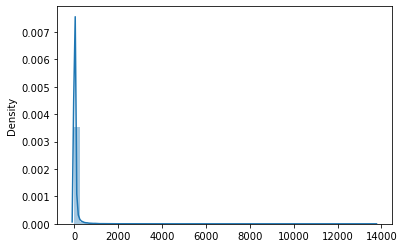

In [88]:

sns.distplot(ls)

## most listened Users

In [91]:
df['user_id'].value_counts()[:20]

316110734d8da7478cc33237458814f770a9eb7a    57
ad4b2717e89766b66b96fe52a38736116e315874    57
d30e18323f15426c3cdc8585252ed34459916f51    55
3233c598c50f0ddbd351504e773cd51de79691db    55
016a24e91a72c159a5048ab1b9b2ba5ce761b526    54
9b0f827c8bad0cf089b0d778307e1b390f463730    54
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    54
70060f2eba3f2486a7a147546adf4e6b1660e295    53
03ad93fdb01506ce205f4708decf8e4b1ae90fff    53
7d90be8dfdbde170f036ce8a4b915440137cb11c    53
a251b1ac6982e1a3abeb09f90f41a671c76dfcad    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
992fea335363e87217e1b052fd7380b3fd7e35b4    51
fd94f121ddfa8521f2348cb9863f0a7b475b7690    51
7e27789eae69bc946c51833c0b833a49c58ed9ed    51
4759c3e074d8a6d1caeab6ca4a88c06384d42748    51
e99ef008f893efd071a7a77be6f1e8d23b962278    51
9769ebffc543fa42b58daf6f52f8816abf5f408e    51
0c210254fc2eaf598f3a1b68212d4202d91a9935    51
e08848e92427e9ef8add59a1264c484e1078d5a5    51
Name: user_id, dtype: int64

In [93]:
df['user_id'].unique()

array(['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d',
       'c34670d9c1718361feb93068a853cead3c95b76a',
       'c5006d9f41f68ccccbf5ee29212b6af494110c5e', ...,
       '0af57c45d9cfcbbebf3d848af2b63c8e09310000',
       'a9c8e4e31fd97d1b90387e31ef1fc0b0997480cd',
       '069451c27c4cfee43c6fd5cf1e6ec34bf01d580c'], dtype=object)

In [97]:
ls2 = list(df['user_id'].value_counts())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

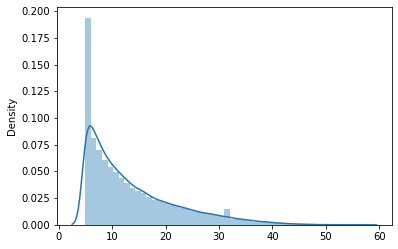

In [98]:
sns.distplot(ls2)

In [103]:
def max(a):
    max = 0
    for i in a:
        if max<i:
            max = i
        else:
            max = max
    return max
max(ls2)
        

57